# INFO 1998 
## Yu-Jung Chen, Fatima Yuen

Problem statement: Predicting Autumn rainfall in Australia using data from year-year




Rain in Australia https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

*Hypothesis*: The days with the most rain will be the days when the humidity at 9am is the highest.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier



The file weatherAUS.csv is the original data. And we looked it up on the internet for the cities' latitude and longitude in Australia and add it to weatherAUS_1.csv.

In [2]:
# obtain the file over google drive
!gdown --id '138b3ElgXL6GhJkxG-T7CnWqqcLQARkOZ' --output weatherAUS.csv
!gdown --id '1ZpfrftGvE1r9s9DB7R57SpPX7sGY9XOx' --output weatherAUS_1.csv



'gdown' is not recognized as an internal or external command,
operable program or batch file.
'gdown' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
weather = pd.read_csv('weatherAUS_1.csv')
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Latitude,Longitude
0,12/1/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,-36.08078,146.916473
1,12/2/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,-36.08078,146.916473
2,12/3/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,-36.08078,146.916473
3,12/4/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,-36.08078,146.916473
4,12/5/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,-36.08078,146.916473


Column name descriptions 
* Temperatures are in degrees
* Rainfall: mm
* Sushine: number of hours bright sunshine in a day
* WindGustDir: direction of the strongest wind gust in the 24 hours to midnight
* WindSpeed: speed (km/h) of the strongest wind gust in the 24 hours to midnight
* Humidity: humidity percent
* Pressure(time): Atmospheric pressure (hpa) reduced to mean sea level at (time)
* Cloud(time): Fraction of sky obscured by cloud at (time). This is measured in "oktas", which are a unit of eigths. It records how many

In [4]:
weather2=weather.copy()
# weather2 = weather2[weather2['Location'] == "Sydney"] #we only want sydney
weather2['Date'] = pd.to_datetime(weather2['Date'])
start_date = '2014-01-01'
end_date = '2017-12-31' 
weather2 =weather2[ (weather2['Date'] > start_date) & (weather2['Date'] <= end_date)] #only keep these dates

df=pd.DataFrame(weather2)
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')

# set season to Autumn, months assume to be 3, 4, 5
weather2= df[df['Date'].dt.month == 3 ]
weather2 = weather2.append(df[df['Date'].dt.month == 4 ])
weather2 = weather2.append(df[df['Date'].dt.month == 5 ])
weather2


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Latitude,Longitude
1827,2014-03-01,Albury,17.0,27.2,8.8,NaN,NaN,NE,50.0,NaN,...,1020.9,1018.0,8.0,6.0,18.5,25.0,Yes,No,-36.08078,146.916473
1828,2014-03-02,Albury,15.8,30.0,0.0,NaN,NaN,NE,20.0,S,...,1020.5,1018.4,1.0,NaN,19.0,27.9,No,No,-36.08078,146.916473
1829,2014-03-03,Albury,15.9,32.3,0.0,NaN,NaN,SE,19.0,SSE,...,1024.0,1021.1,NaN,NaN,19.8,29.7,No,No,-36.08078,146.916473
1830,2014-03-04,Albury,15.9,32.2,0.0,NaN,NaN,SSE,41.0,SE,...,1024.5,1019.9,NaN,1.0,21.2,30.4,No,No,-36.08078,146.916473
1831,2014-03-05,Albury,19.7,31.5,0.2,NaN,NaN,N,28.0,NE,...,1017.2,1013.9,1.0,7.0,22.1,29.6,No,No,-36.08078,146.916473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145430,2017-05-27,Uluru,9.3,28.0,0.0,NaN,NaN,W,28.0,SSW,...,1019.9,1016.9,NaN,NaN,16.6,27.3,No,No,-25.34440,131.036900
145431,2017-05-28,Uluru,8.0,24.6,0.0,NaN,NaN,E,33.0,SE,...,1021.7,1018.8,4.0,NaN,13.8,23.5,No,No,-25.34440,131.036900
145432,2017-05-29,Uluru,12.7,22.2,0.0,NaN,NaN,E,37.0,E,...,1024.3,1021.7,8.0,8.0,13.9,21.0,No,No,-25.34440,131.036900
145433,2017-05-30,Uluru,9.4,22.7,0.0,NaN,NaN,E,35.0,SE,...,1026.6,1023.6,8.0,4.0,11.8,22.3,No,No,-25.34440,131.036900


# New Section

In [5]:
weather2.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Latitude,Longitude
MinTemp,1.000000,0.696699,0.125619,0.357730,0.052324,0.153678,0.184727,0.180127,-0.167048,0.094455,-0.427849,-0.444329,0.022259,-0.003827,0.902686,0.664185,0.584933,0.039852
MaxTemp,0.696699,1.000000,-0.068869,0.489923,0.480898,-0.013609,-0.012208,0.020544,-0.426028,-0.467499,-0.291890,-0.404509,-0.327785,-0.293922,0.848826,0.983470,0.574289,-0.054467
Rainfall,0.125619,-0.068869,1.000000,-0.039257,-0.197214,0.155827,0.102586,0.079381,0.205201,0.257053,-0.156452,-0.116759,0.168754,0.142904,0.034530,-0.076776,0.051060,0.045143
Evaporation,0.357730,0.489923,-0.039257,1.000000,0.289109,0.159541,0.166862,0.107814,-0.405725,-0.326972,-0.196766,-0.226891,-0.183378,-0.155026,0.427723,0.480494,0.283724,-0.005658
Sunshine,0.052324,0.480898,-0.197214,0.289109,1.000000,-0.101019,-0.041684,0.004738,-0.406274,-0.598951,0.093771,0.016330,-0.687328,-0.695733,0.253776,0.507343,0.255243,-0.037763
WindGustSpeed,0.153678,-0.013609,0.155827,0.159541,-0.101019,1.000000,0.597603,0.685410,-0.135958,0.050279,-0.407894,-0.340033,0.075816,0.116048,0.094614,-0.052558,-0.010467,-0.006404
WindSpeed9am,0.184727,-0.012208,0.102586,0.166862,-0.041684,0.597603,1.000000,0.508702,-0.254876,0.004047,-0.172544,-0.117009,0.015337,0.048463,0.129191,-0.020961,0.093298,-0.004324
WindSpeed3pm,0.180127,0.020544,0.079381,0.107814,0.004738,0.685410,0.508702,1.000000,-0.088245,0.066015,-0.259994,-0.200720,0.051076,0.035377,0.152278,-0.002687,0.079551,0.022664
Humidity9am,-0.167048,-0.426028,0.205201,-0.405725,-0.406274,-0.135958,-0.254876,-0.088245,1.000000,0.628241,0.061387,0.107843,0.416470,0.307759,-0.387427,-0.430361,-0.264461,0.081565
Humidity3pm,0.094455,-0.467499,0.257053,-0.326972,-0.598951,0.050279,0.004047,0.066015,0.628241,1.000000,-0.076477,0.002971,0.476643,0.488084,-0.117937,-0.519483,-0.099051,0.124948


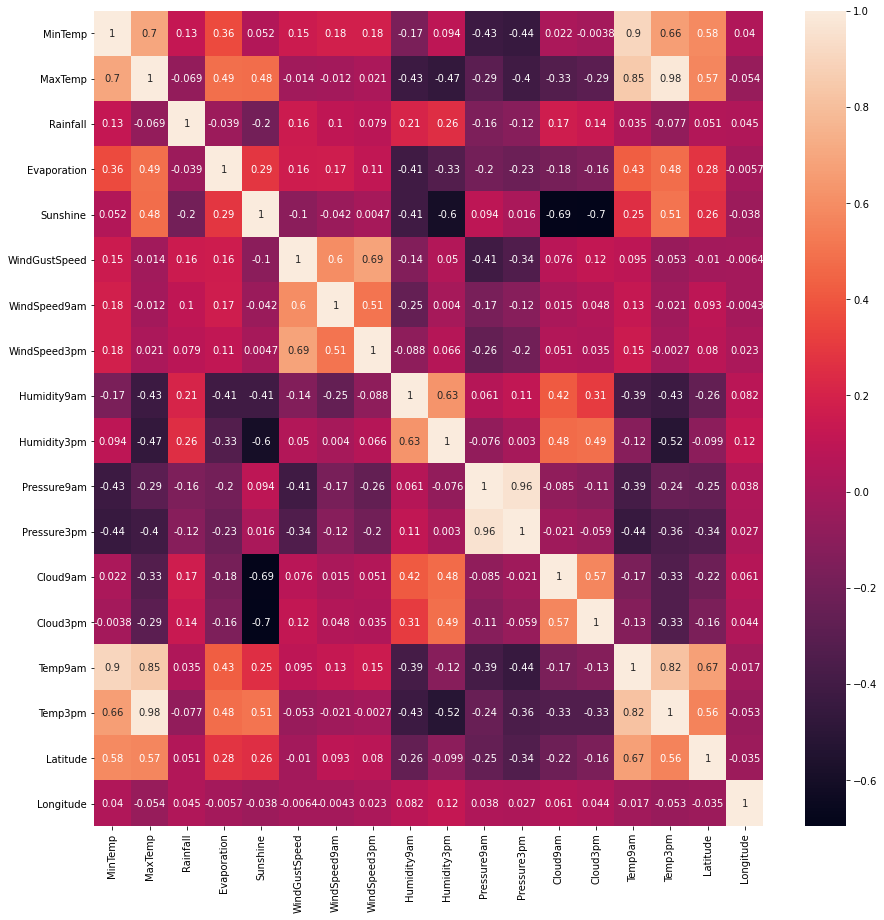

In [6]:
# visualize the correlation matrix to see the heatmap

data= weather2.corr()

import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
sn.heatmap(data, annot=True)
plt.show()

Most correlated features:
---------------------------
1. Humidity3pm (0.257053)
2. Humidity9am (0.205201)
3. Sunshine (-0.197214)
4. Cloud9am (0.168754)
5. Pressure9am (-0.156452)
6. WindGustSpeed (0.155827)

Model 1: **Linear Regression** to predict Rainfall with different numbers of feature

In [7]:
cleandata_weather2= pd.DataFrame(weather2)
cleandata_weather2

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Latitude,Longitude
1827,2014-03-01,Albury,17.0,27.2,8.8,NaN,NaN,NE,50.0,NaN,...,1020.9,1018.0,8.0,6.0,18.5,25.0,Yes,No,-36.08078,146.916473
1828,2014-03-02,Albury,15.8,30.0,0.0,NaN,NaN,NE,20.0,S,...,1020.5,1018.4,1.0,NaN,19.0,27.9,No,No,-36.08078,146.916473
1829,2014-03-03,Albury,15.9,32.3,0.0,NaN,NaN,SE,19.0,SSE,...,1024.0,1021.1,NaN,NaN,19.8,29.7,No,No,-36.08078,146.916473
1830,2014-03-04,Albury,15.9,32.2,0.0,NaN,NaN,SSE,41.0,SE,...,1024.5,1019.9,NaN,1.0,21.2,30.4,No,No,-36.08078,146.916473
1831,2014-03-05,Albury,19.7,31.5,0.2,NaN,NaN,N,28.0,NE,...,1017.2,1013.9,1.0,7.0,22.1,29.6,No,No,-36.08078,146.916473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145430,2017-05-27,Uluru,9.3,28.0,0.0,NaN,NaN,W,28.0,SSW,...,1019.9,1016.9,NaN,NaN,16.6,27.3,No,No,-25.34440,131.036900
145431,2017-05-28,Uluru,8.0,24.6,0.0,NaN,NaN,E,33.0,SE,...,1021.7,1018.8,4.0,NaN,13.8,23.5,No,No,-25.34440,131.036900
145432,2017-05-29,Uluru,12.7,22.2,0.0,NaN,NaN,E,37.0,E,...,1024.3,1021.7,8.0,8.0,13.9,21.0,No,No,-25.34440,131.036900
145433,2017-05-30,Uluru,9.4,22.7,0.0,NaN,NaN,E,35.0,SE,...,1026.6,1023.6,8.0,4.0,11.8,22.3,No,No,-25.34440,131.036900


In [8]:

# using three features (with highest correlated feature score): 'Humidity9am', 'Sunshine', 'Humidity3pm' to predict rainfall
three_correlated_features= cleandata_weather2[['Humidity9am', 'Sunshine', 'Humidity3pm', 'Rainfall', 'RainToday', 'Latitude', 'Longitude']]
three_correlated_features= three_correlated_features.dropna()

correlated_features = three_correlated_features[['Humidity9am', 'Sunshine', 'Humidity3pm', 'Latitude', 'Longitude']]
target= three_correlated_features['Rainfall']

x_tr_3, x_te_3, y_tr_3, y_te_3 = train_test_split(correlated_features, target, test_size = 0.3, random_state=42)
threeftmodel= LinearRegression()
threeftmodel.fit(x_tr_3,  y_tr_3)
threepred = threeftmodel.predict(x_te_3)


print("Score for 3 features to predict: ", threeftmodel.score(x_tr_3, y_tr_3))


# using six features: 'WindGustSpeed', 'Sunshine', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Pressure9am' to predict rainfall
six_correlated_features = cleandata_weather2[['WindGustSpeed', 'Sunshine', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Pressure9am', 'Rainfall', 'RainToday', 'Latitude', 'Longitude']]
six_correlated_features = six_correlated_features.dropna()

correlated_features = six_correlated_features[['WindGustSpeed', 'Sunshine', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Pressure9am', 'Latitude', 'Longitude']]
target = six_correlated_features['Rainfall']

x_tr_6, x_te_6, y_tr_6, y_te_6 = train_test_split(correlated_features, target, test_size = 0.3, random_state=42)
sixftmodel= LinearRegression()
sixftmodel.fit(x_tr_6, y_tr_6)
sixpred = sixftmodel.predict(x_te_6)

print("Score for 6 features to predict: ", sixftmodel.score(x_tr_6, y_tr_6))


Score for 3 features to predict:  0.10011968887460543
Score for 6 features to predict:  0.11864268545274803


Our linear regression model that uses three of the most correlated features to predict how much rainfall a city gets on a certain day has a score of 0.07755004822621447 while our model with six predictors has a score of 0.10490489589413343. These are the coefficent of determination, or the R^2 value. Both features have pretty low r-squared values which means the model does not fit the observed data that well. The score for the 6 feautre model is greater than the three feature model by about 0.0274. This shows us that we don't need to have all features to show almost the same results, and selecting a feature subset of lesser size may be more resource-efficient. The fact that even a model of the most correlated features to predict the amount of rainfall does not have a high score may mean that the amount of rainfall is affected or determined by other features not included in this dataset. Amount of rainfall may be more complicated than the variables included in this dataset, ie the difference of topology, seaward, latitude, etc.  

Model 2: **kNN** to predict whether it will rain

In [9]:
## 3 features to predict RainToday

features= three_correlated_features[['Humidity9am', 'Sunshine', 'Humidity3pm']]
target= three_correlated_features['RainToday']

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

# This is the function we use to create the kNN model (default k=5)
model = KNeighborsClassifier()

# TODO fit the model using the train data
model.fit(x_train, y_train)

# TODO store the predictions for the test sets
predictions =  model.predict(x_test)
from sklearn.metrics import accuracy_score
print("sklearn's 3 features accuracy score for RainToday:", accuracy_score(y_test, predictions) )

## 6 features to predict RainToday
features= six_correlated_features[['WindGustSpeed', 'Sunshine', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Pressure9am']]
target= six_correlated_features['RainToday']

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)
model = KNeighborsClassifier()
model.fit(x_train, y_train)
predictions =  model.predict(x_test)
from sklearn.metrics import accuracy_score
print("sklearn's 6 features accuracy score for RainToday:", accuracy_score(y_test, predictions) )

sklearn's 3 features accuracy score for RainToday: 0.7830188679245284
sklearn's 6 features accuracy score for RainToday: 0.7893518518518519


The second model we use is kNN to predict whether it will rain or not. Before going into the model here, there are some pros and cons. The pro would be it is easy to implement and it is a lazy learner and therefore requires no training prior to making real time predictions. As for cons, The KNN algorithm doesn't work well with high dimensional data because with large number of dimensions, it is hard to calculate the distance among high dimensions. Thus, the model we predict here, while having amost 0.8 accuracy score for RainToday, for the target data they would only be yes and no RainToday for the training data to predict, and thus, making the score higher as compared to the accuracy score on our linear regression model. But we can still derive the same result that with higher numbers of correlated features, the accuracy score would improve. 

**Plot the 2D Scatter Plots**

We plot the linear regression models results on 2D scatter plots over a map of Australia.

In [10]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
!pip install pyproj==1.9.6

import os
os.environ["PROJ_LIB"] = "C:\Anaconda\Library\share"; 
from mpl_toolkits.basemap import Basemap


'apt-get' is not recognized as an internal or external command,
operable program or batch file.
'apt-get' is not recognized as an internal or external command,
operable program or batch file.


    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\YU-JUNG CHEN\anaconda3\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\YU-JUNG CHEN\\AppData\\Local\\Temp\\pip-req-build-5hxnln3t\\setup.py'"'"'; __file__='"'"'C:\\Users\\YU-JUNG CHEN\\AppData\\Local\\Temp\\pip-req-build-5hxnln3t\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\YU-JUNG CHEN\AppData\Local\Temp\pip-pip-egg-info-uvqwk1cq'
         cwd: C:\Users\YU-JUNG CHEN\AppData\Local\Temp\pip-req-build-5hxnln3t\
    Complete output (18 lines):
    checking for GEOS lib in C:\Users\YU-JUNG CHEN ....
    checking for GEOS lib in C:\Users\YU-JUNG CHEN\local ....
    checking for GEOS lib in /usr ....
    checking for GEOS lib in /usr/local ....
    checking for GEOS lib in /sw ....
    checking for GEOS lib in /opt ....
    chec

  Running setup.py clean for pyproj
Failed to build pyproj
  Attempting uninstall: pyproj
    Found existing installation: pyproj 3.0.1
    Uninstalling pyproj-3.0.1:
      Successfully uninstalled pyproj-3.0.1
    Running setup.py install for pyproj: started
    Running setup.py install for pyproj: finished with status 'error'
  Rolling back uninstall of pyproj
  Moving to c:\users\yu-jung chen\anaconda3\lib\site-packages\pyproj-3.0.1.dist-info\
   from C:\Users\YU-JUNG CHEN\anaconda3\Lib\site-packages\~yproj-3.0.1.dist-info
  Moving to c:\users\yu-jung chen\anaconda3\lib\site-packages\pyproj\
   from C:\Users\YU-JUNG CHEN\anaconda3\Lib\site-packages\~yproj
  Moving to c:\users\yu-jung chen\anaconda3\scripts\pyproj-script.py
   from C:\Users\YU-JUNG CHEN\AppData\Local\Temp\pip-uninstall-r29daw3k\pyproj-script.py
  Moving to c:\users\yu-jung chen\anaconda3\scripts\pyproj.exe
   from C:\Users\YU-JUNG CHEN\AppData\Local\Temp\pip-uninstall-r29daw3k\pyproj.exe


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\YU-JUNG CHEN\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\YU-JUNG CHEN\\AppData\\Local\\Temp\\pip-install-gjuhl8w9\\pyproj\\setup.py'"'"'; __file__='"'"'C:\\Users\\YU-JUNG CHEN\\AppData\\Local\\Temp\\pip-install-gjuhl8w9\\pyproj\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\YU-JUNG CHEN\AppData\Local\Temp\pip-wheel-5qypdm4w'
       cwd: C:\Users\YU-JUNG CHEN\AppData\Local\Temp\pip-install-gjuhl8w9\pyproj\
  Complete output (523 lines):
  using bundled proj4..
  nad2bin.c
  nad2bin.c(130): warning C4244: '=': conversion from 'double' to 'float', possible loss of data
  nad2bin.c(131): warning C4244: '=': conversion from 'double' to 'float', possible loss of data
  nad2bin.c(138): warning C4244: '=': conversion from 'd

In [11]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


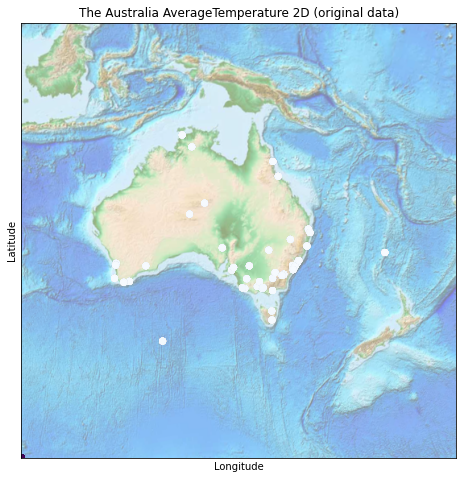

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


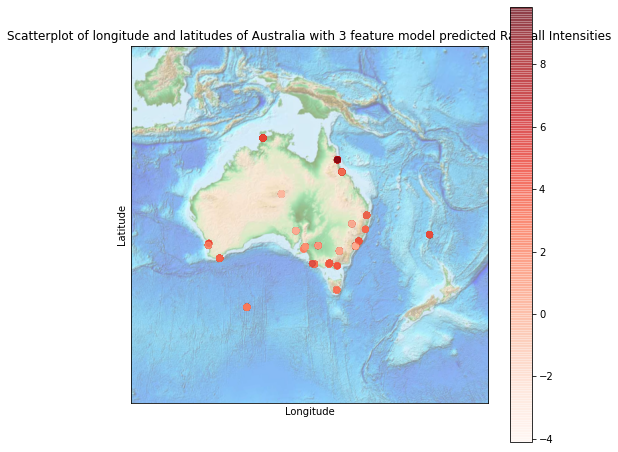

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


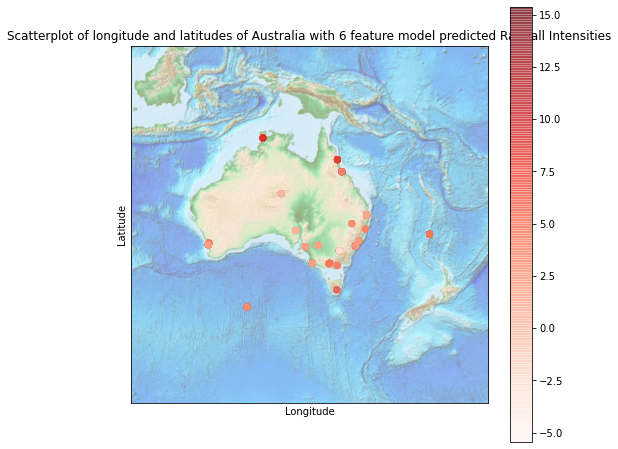

In [12]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6, 
            lat_0=-30, lon_0=140,)
m.etopo(scale=0.5, alpha=0.5)


# map Rainfall for plotting
x1 = cleandata_weather2['Longitude'].values
x2 = cleandata_weather2['Latitude'].values
plt.scatter(x1,  x2, c=cleandata_weather2['Rainfall'].values.ravel() )


m.scatter(x1, x2, latlon=True, c=cleandata_weather2['Rainfall'], cmap='Blues', alpha=0.5)
plt.title('The Australia AverageTemperature 2D (original data)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# 3 features 
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6, 
            lat_0=-30, lon_0=140,)
m.etopo(scale=0.5, alpha=0.5)
x3_1 = x_te_3['Longitude'].values
x3_2 = x_te_3['Latitude'].values
x3_3 = threepred
m.scatter(x3_1, x3_2, latlon=True,
          c=x3_3, 
          cmap='Reds', alpha=0.5)
plt.title("Scatterplot of longitude and latitudes of Australia with 3 feature model predicted Rainfall Intensities")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar()
plt.show()

# 6 features 
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6, 
            lat_0=-30, lon_0=140,)
m.etopo(scale=0.5, alpha=0.5)
x6_1 = x_te_6['Longitude'].values
x6_2 = x_te_6['Latitude'].values
x6_3 = sixpred
m.scatter(x6_1, x6_2, latlon=True,
          c=x6_3, 
          cmap='Reds', alpha=0.5)
plt.title("Scatterplot of longitude and latitudes of Australia with 6 feature model predicted Rainfall Intensities")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar()
plt.show()

Above are scatter plots of the longitude and latitudes of cities in Australia with their respective Rainfall intensities. The first scatter plot is of the data we have from our cleaned data set. The next two plots are from based on our predicted Rainfall amounts from the 3 feature and 6 feature linear regression models. Compared to the first scatter plot, the last two have fewer points plotted. The plots of the models also convey that there happens to be heavier Rainfall in locations closer to coastlines than locations more inland. The scale of rainfall and model score of our 6 feature model is also greater than those of our 3 feature model, but only by about 0.0274. The accuracy scores from our kNN models are also very similar and only differ by about 0.0063. This could be why our scatterplots for the 2 models look very similar, except for the differences in scale size. The models are not very accurate which could be due to the possibility of Rainfall being much more complicated than the information provided to us in our dataset. For example, there could be other important factors not included in our dataset such as topology or seaward that affect Rainfall. 